### The Zhang-Suen's Thinning Algorithm

In [5]:
!wget https://www.dropbox.com/s/ufadmw4xbtpi2fc/japanese_character.png
!wget https://h5p.org/sites/default/files/h5p/content/67482/images/match-58e784c21f16f.jpg

--2022-04-04 00:40:24--  https://www.dropbox.com/s/ufadmw4xbtpi2fc/japanese_character.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ufadmw4xbtpi2fc/japanese_character.png [following]
--2022-04-04 00:40:24--  https://www.dropbox.com/s/raw/ufadmw4xbtpi2fc/japanese_character.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1dba9b6ae249ede159330ae3b8.dl.dropboxusercontent.com/cd/0/inline/BisYfo6R13WJh026CFPpGvWkb_EdROMCbBCoRXLkfCsggYWs386hqEkUttwzOOXFLDsRgiIq0bt8d_Z__jSLYpa2EbUPPWYBEK36tg1CM2vwfmnrnBgrTL9PCq3wXpJDKmi-3ea2FhHf65eWx_hTFFU8kJ6VZumpfmnHcm9JB-7skA/file# [following]
--2022-04-04 00:40:25--  https://uc1dba9b6ae249ede159330ae3b8.dl.dropboxusercontent.com/cd/0/inline/BisYfo6R13WJh026CFPpGvWkb_EdROMCbBCoRX

In [14]:
import cv2
import numpy as np

img = cv2.imread('japanese_character.png', 0)
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
bin_thresh = (thresh1 == 0).astype(int)

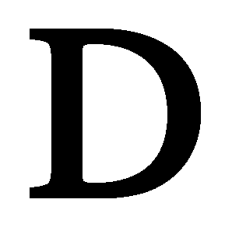

In [7]:
from matplotlib import pyplot as plt
plt.imshow(1-bin_thresh, cmap='gray'), plt.axis("off")
plt.show()

In [8]:
print(bin_thresh)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
"""No need to implement condition 0, I will be iterating pixels which does not include edges(does not have 8 neighbors)"""

'No need to implement condition 0, I will be iterating pixels which does not include edges(does not have 8 neighbors)'

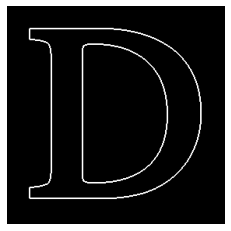

In [9]:
def cond_1(image): # 2 < = N(P1) < = 6
  mark_matrix=np.zeros(image.shape)
  for i in range(2,len(image[::,0])-2):
    for j in range(2,len(image[0,::])-2):
      block=image[i-1:i+2,j-1:j+2]
      if (np.sum(np.sum(block))-image[i,j])>=2 and (np.sum(np.sum(block))-image[i,j])<=6:
         mark_matrix[i,j]=1
  return mark_matrix
from matplotlib import pyplot as plt
plt.imshow(cond_1(bin_thresh), cmap='gray'), plt.axis("off")
plt.show()

In [10]:
def cond_2(image): # S(P1) = 1
  mark_matrix=np.zeros(image.shape)
  for i in range(2,len(image[::,0])-2):
    for j in range(2,len(image[0,::])-2):
      if image[i-1,j]<image[i-1,j+1]: mark_matrix[i,j]+=1
      if image[i-1,j+1]<image[i,j+1]: mark_matrix[i,j]+=1
      if image[i,j+1]<image[i+1,j+1]: mark_matrix[i,j]+=1
      if image[i+1,j+1]<image[i+1,j]: mark_matrix[i,j]+=1
      if image[i+1,j]<image[i+1,j-1]: mark_matrix[i,j]+=1
      if image[i+1,j-1]<image[i,j-1]: mark_matrix[i,j]+=1
      if image[i,j-1]<image[i-1,j-1]: mark_matrix[i,j]+=1
      if image[i-1,j-1]<image[i-1,j]: mark_matrix[i,j]+=1
      if mark_matrix[i,j]!=1: mark_matrix[i,j]=0
  return mark_matrix


In [11]:
def cond_3_4(image):
  mark_matrix=np.zeros(image.shape)
  for i in range(2,len(image[::,0])-2):
    for j in range(2,len(image[0,::])-2):
      all_neighbors=[(i-1,j),(i-1,j+1),(i,j+1),(i+1,j+1),(i+1,j),(i+1,j-1),(i,j-1),(i-1,j-1)]
      p2,p3,p4,p5,p6,p7,p8,p9=list(map(lambda x:image[x],all_neighbors))
      if p2*p4*p6==0 and p4*p6*p8==0: mark_matrix[i,j]=1
  return mark_matrix
def cond_3_4_v2(image):
  mark_matrix=np.zeros(image.shape)
  for i in range(2,len(image[::,0])-2):
    for j in range(2,len(image[0,::])-2):
      all_neighbors=[(i-1,j),(i-1,j+1),(i,j+1),(i+1,j+1),(i+1,j),(i+1,j-1),(i,j-1),(i-1,j-1)]
      p2,p3,p4,p5,p6,p7,p8,p9=list(map(lambda x:image[x],all_neighbors))
      if p2*p4*p8==0 and p2*p6*p8==0: mark_matrix[i,j]=1
  return mark_matrix

1


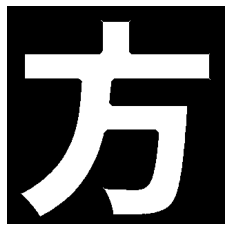

2


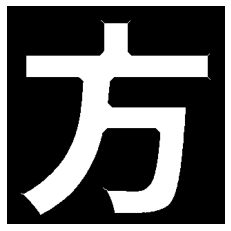

3


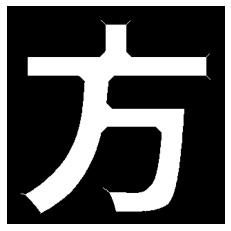

4


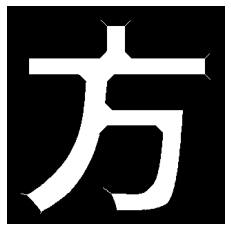

5


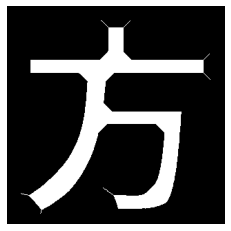

6


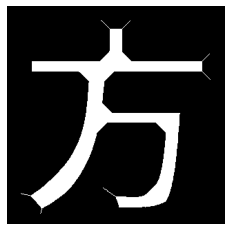

7


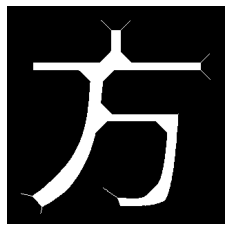

8


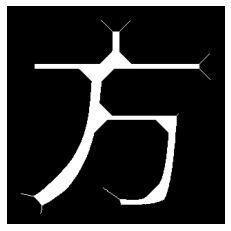

9


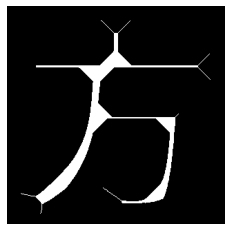

10


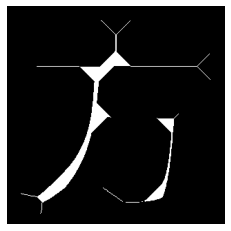

11


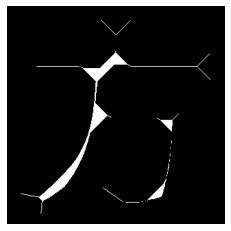

12


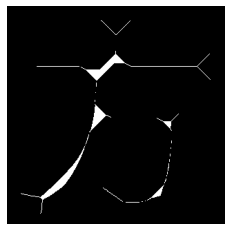

13


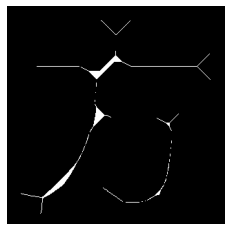

14


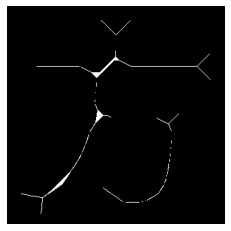

15


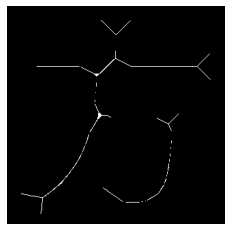

16


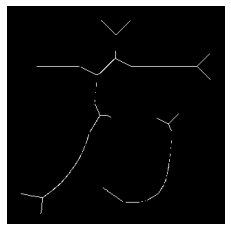

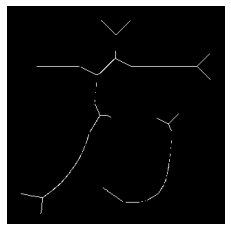

In [17]:

from matplotlib import pyplot as plt
def step_1(image):
    return np.logical_and(image,1-np.logical_and(cond_1(image),cond_2(image),cond_3_4(image)))
def step_2(image):
    return np.logical_and(image,1-np.logical_and(cond_1(image),cond_2(image),cond_3_4_v2(image)))
image=step_1(bin_thresh)
v=0
while True:
    v+=1
    a0=image.copy()
    image=step_1(image)
    if np.array_equal(a0,image):
      break
    image=step_2(image)
    print(v)
    plt.imshow(image, cmap='gray'), plt.axis("off")
    plt.show()
    if np.array_equal(a0,image):
      break
plt.imshow(image, cmap='gray'), plt.axis("off")
plt.show()

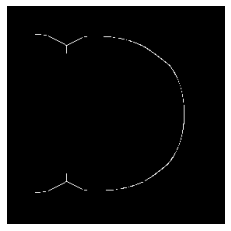

In [15]:
while True:
    v+=1
    a0=image.copy()
    image=step_1(image)
    if np.array_equal(a0,image):
      break
    image=step_2(image)
    print(v)
    plt.imshow(image, cmap='gray'), plt.axis("off")
    plt.show()
    if np.array_equal(a0,image):
      break
plt.imshow(image, cmap='gray'), plt.axis("off")
plt.show()